In [1]:
import sympy 
from sympy import symbols
import pyomo
import matplotlib.pyplot as plt
import numpy as np
sympy.init_printing()

# Problem 1 Gradient and Hessian of Multivariate Scalar Function

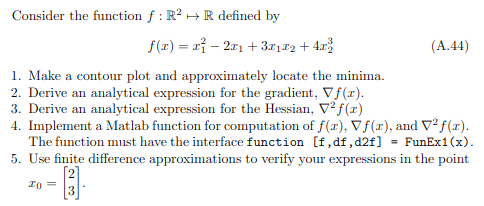

In [24]:
# I define the function f
x = symbols("x:2", real=True)
f = x[0] ** 2 - 2 * x[0] + 3 * x[0]*x[1] + 4 * x[1]**4
f_lamb = sympy.lambdify(x,f,'numpy')
f

## 1 Countour plot and locate the minima

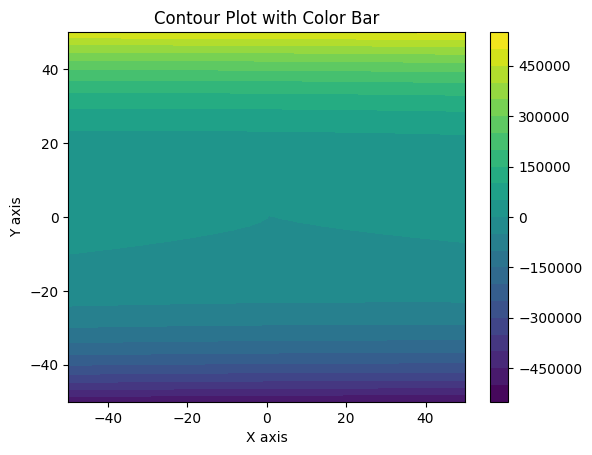

In [115]:
import matplotlib.pyplot as plt
import numpy as np

# Create a grid of points
X = np.linspace(-50, 50, 100)
Y = np.linspace(-50, 50, 100)
X, Y = np.meshgrid(X, Y)

# Define a function to plot
Z = f_lamb(X,Y)
# Create a contour plot
# Create a contour plot
contour = plt.contourf(X, Y, Z, levels=20)  # Using 20 contour levels for smoothness

# Add a color bar
plt.colorbar(contour)

# Add additional features
plt.title('Contour Plot with Color Bar')
plt.xlabel('X axis')
plt.ylabel('Y axis')

# Show the plot
plt.show()

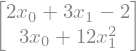

In [16]:
# I turn the functions and symbols into arrays
f_m = sympy.Array([f])
x_m = sympy.Array(x)

# 2
grad = f_m.diff(x_m)
f_grad_lamb = sympy.lambdify(x,grad,'numpy')
grad

/tmp/ipykernel_9773/66362690.py:3: SymPyDeprecationWarning: 

non-Expr objects in a Matrix is deprecated. Matrix represents
a mathematical matrix. To represent a container of non-numeric
entities, Use a list of lists, TableForm, NumPy array, or some
other data structure instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-non-expr-in-matrix
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  f_hess_lamb = sympy.lambdify(x,sympy.Matrix(hess), 'numpy')


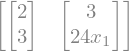

In [76]:
hess = f_m.diff(x_m).diff(x_m)
#f_hess_lamb = sympy.lambdify(x[1],Hess,'numpy')
f_hess_lamb = sympy.lambdify(x,sympy.Matrix(hess), 'numpy')
hess

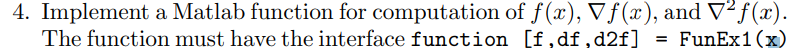

In [86]:
def funex1(x):
    return [f_lamb(*x), f_grad_lamb(*x), f_hess_lamb(*x)]

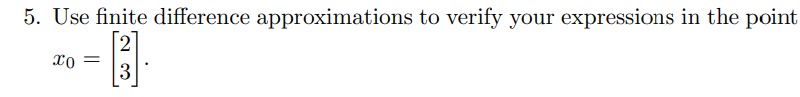

In [87]:
x0 = [2,3]
funex1(x0)

[126,
 array([[ 11],
        [114]]),
 array([[[ 2],
         [ 3]],
 
        [[ 3],
         [72]]])]

In [32]:
import pyomo.environ as pyo
f_lamb_m = sympy.lambdify(x,f,'math')
# Define your multivariate function, its gradient, and Hessian
def my_function(vars):
    x,y = vars
    return f_lamb_m(x,y)
# Create a Pyomo model
model = pyo.ConcreteModel()

# Define variables
model.x = pyo.Var(domain=pyo.Reals, initialize=-2.)  # Change initial value as needed
model.y = pyo.Var(domain=pyo.Reals, initialize=10.)  # Change initial value as needed

# Define the objective function
model.objective = pyo.Objective(expr=my_function([model.x, model.y]), sense=pyo.minimize)

# Solve the model
solver = pyo.SolverFactory('glpk')  # Use IPOPT or another suitable solver
result = solver.solve(model, tee=True)  # tee=True for solver output

# Print the results
print("Solution Status:", result.solver.status)
print("Solution X:", pyo.value(model.x))
print("Solution Y:", pyo.value(model.y))

solver 'glpk'


ApplicationError: No executable found for solver 'glpk'

In [25]:
from scipy.optimize import minimize
minimize(lambda x: f_lamb(*x), x0=[1,1])

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -3.25318255942316
        x: [ 2.099e+00 -7.329e-01]
      nit: 8
      jac: [-1.788e-07 -5.960e-08]
 hess_inv: [[ 6.139e-01 -7.077e-02]
            [-7.077e-02  4.695e-02]]
     nfev: 36
     njev: 12

In [31]:
f_lamb(2.099,-7.329* 10**(-1))

# Problem 2: Rosenbrock function

In [91]:
x = symbols("x:2", real=True)
p = [100,1]
f = p[0] * (x[1] - x[0]**2)**2 + p[1] * (1-x[0])**2
f_lamb = sympy.lambdify(x,f,'numpy')
f

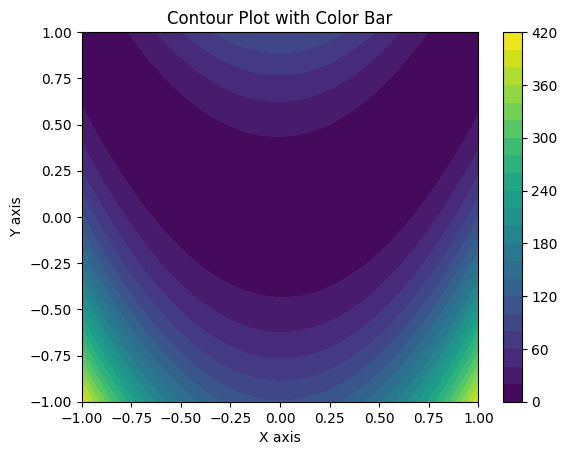

In [102]:

# Create a grid of points
X = np.linspace(-1, 1, 100)
Y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(X, Y)

# Define a function to plot
Z = f_lamb(X,Y)
# Create a contour plot
contour = plt.contourf(X, Y, Z, levels=20)  # Using 20 contour levels for smoothness

# Add a color bar
plt.colorbar(contour)

# Add additional features
plt.title('Contour Plot with Color Bar')
plt.xlabel('X axis')
plt.ylabel('Y axis')

# Show the plot
plt.show()

## The rest of the sub-problems are a repeat

# Problem 3 Derivatives of a Multivariate Vector Function

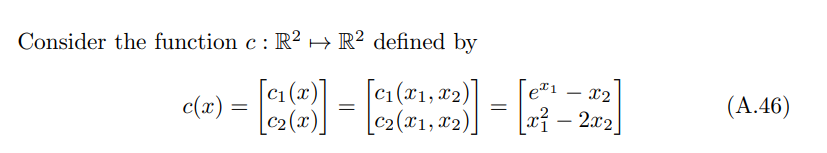

In [116]:
X = symbols("x:2", real=True)
Xm = sympy.Array(X)
c1 = sympy.exp(x[0]) - x[1]
c2 = x[0]**2- 2 * x[1]
c = sympy.Array([c1,c2])
c

In [120]:
sympy.Array(np.diag(c.diff(Xm)))

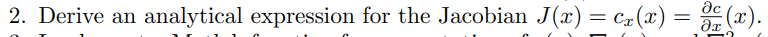

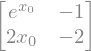

In [118]:
sympy.Matrix(c.diff(Xm)).T